In [1]:
# importing dependencies

from obspy import read
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

## Finding the event

1 Event(s) in Catalog:
2005-03-28T16:09:35.290000Z |  +2.096,  +97.113 | 8.6 MW


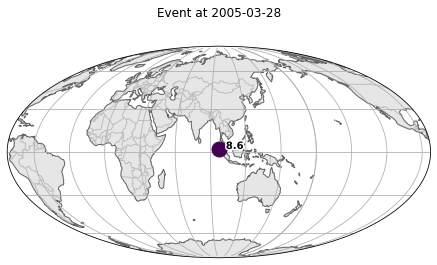

In [2]:
# event time for 2005 Nias–Simeulue earthquake
ns_eq = UTCDateTime("2005-03-28T16:09:36")

# IRIS client
client = Client("IRIS")

# get the event (major >7 magnitude)
catalog = client.get_events(minmagnitude = 7, starttime = ns_eq-100, endtime = ns_eq+3600)

print(catalog)
catalog.plot();

## Finding stations around the event

Inventory created at 2022-01-04T10:25:59.423000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2005-03-28...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (7):
			GE, II, IU, MS, MY, PS, SY
		Stations (31):
			GE.UGM (GEOFON Station Wanagama, Indonesia)
			II.COCO (West Island, Cocos (Keeling) Islands)
			II.PALK (Pallekele, Sri Lanka)
			IU.CHTO (Chiang Mai, Thailand)
			MS.BESC (Beatty Secondary School)
			MS.BTDF (Bukit Timah Dairy Farm)
			MS.KAPK (Katong Park)
			MS.NTU (Nanyang Technology University)
			MS.PTK (Pulau Tekong)
			MY.KKM (Kota Kinabalu)
			MY.KSM (Kuching)
			MY.KUM (Kulim)
			PS.PSI (Parapat, Indonesia)
			SY.BTDF (BTDF synthetic)
			SY.CHTO (CHTO synthetic)
			SY.COCO (COCO synthetic)
			SY.DLV (DLV synthetic)
			SY.GSI (GSI synthetic)
			SY.IPM (IPM synthetic)
			SY.KKM (KKM synthetic)
			SY.KOM (KOM synthetic)
			SY.KSM (KSM synthetic)
			SY.KUM (KUM synthetic)
			

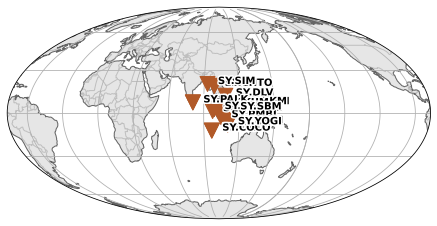

In [3]:
# get event coords
event = catalog[0]
origin = event.origins[0]
t = origin.time

# Define maximum radius
max_r = 20

# get stations
inventory = client.get_stations(latitude = origin.latitude, longitude = origin.longitude, maxradius = max_r,
                               starttime = t-2*60, endtime = t+30*60, matchtimeseries = True)

print(inventory)
inventory.plot();

## Getting waveform data from each station

In [4]:
# defining parameters
loc = "*"
chan = "BHZ"

7 Trace(s) in Stream:
II.COCO.20.BHZ | 2005-03-28T16:07:35.307900Z - 2005-03-28T16:12:25.758786Z | 40.0 Hz, 11619 samples
II.PALK.00.BHZ | 2005-03-28T16:07:35.331800Z - 2005-03-28T16:39:35.241687Z | 20.0 Hz, 38399 samples
IU.CHTO.00.BHZ | 2005-03-28T16:07:35.334768Z - 2005-03-28T16:39:35.284768Z | 20.0 Hz, 38400 samples
MY.KKM..BHZ    | 2005-03-28T16:07:35.319500Z - 2005-03-28T16:39:35.269500Z | 20.0 Hz, 38400 samples
MY.KSM..BHZ    | 2005-03-28T16:07:35.319500Z - 2005-03-28T16:39:35.269500Z | 20.0 Hz, 38400 samples
MY.KUM..BHZ    | 2005-03-28T16:07:35.319500Z - 2005-03-28T16:39:35.269500Z | 20.0 Hz, 38400 samples
PS.PSI..BHZ    | 2005-03-28T16:07:35.311300Z - 2005-03-28T16:39:35.261300Z | 20.0 Hz, 38400 samples


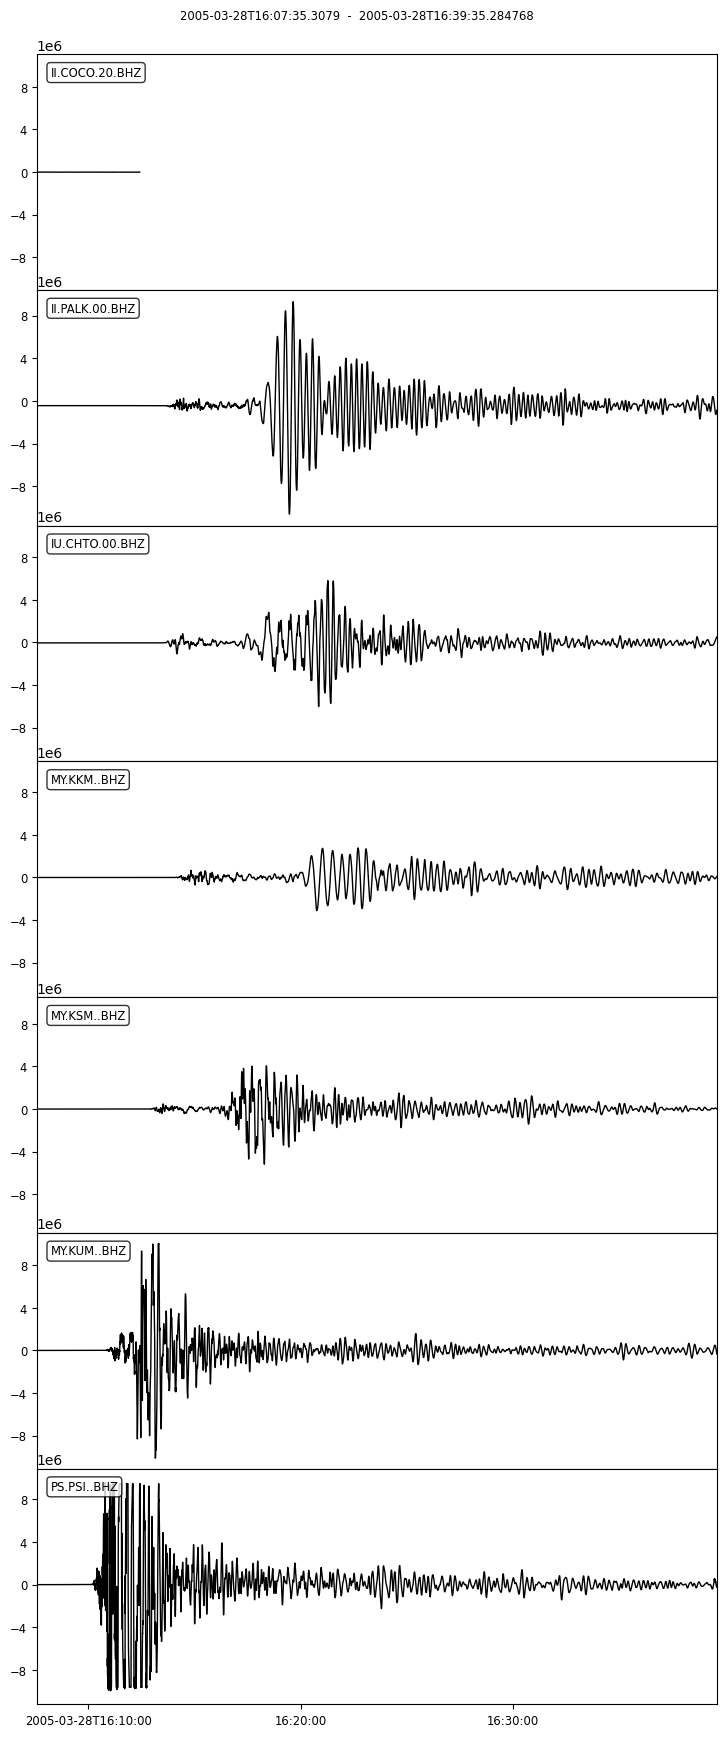

In [5]:
# loop through all stations and get the waveform data if available

from obspy import Stream
st = Stream()

for network in inventory:
    for station in network:
        try:
            st += client.get_waveforms(network.code, station.code, loc, chan,
                                       t - 2 * 60, t + 30 * 60, attach_response=True)
        except:
            pass

print(st)
st.plot();

In [10]:
# filename
name = chan + "_1" + "_" + str(max_r) + "km.mseed"

# write data to a file
st.write(name, format = 'MSEED')


## Trying for all broadband channels

In [11]:
# parameters
chan2 = "BH?"

# loop through all stations and get the waveform data if available

from obspy import Stream
st2 = Stream()

for network in inventory:
    for station in network:
        try:
            st2 += client.get_waveforms(network.code, station.code, loc, chan2,
                                       t - 2 * 60, t + 30 * 60, attach_response=True)
        except:
            pass

print(st2)
st2.plot();

# filename
name2 = chan2 + "_1" + "_" + str(max_r) + "km.mseed"

# write data to a file
st.write(name2, format = 'MSEED')


23 Trace(s) in Stream:

II.COCO.00.BH2 | 2005-03-28T16:07:35.302900Z - 2005-03-28T16:12:09.903738Z | 20.0 Hz, 5493 samples
...
(21 other traces)
...
PS.PSI..BHZ | 2005-03-28T16:07:35.311300Z - 2005-03-28T16:39:35.261300Z | 20.0 Hz, 38400 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


Exception: All traces with the same id need to have the same sampling rate.

<Figure size 800x5500 with 0 Axes>

### Running above cell throws warning 
#### "All traces with the same id need to have the same sampling rate."